<a href="https://colab.research.google.com/github/visheshagrawal/Course-DeepLearning/blob/main/DL_Assignment3_Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [ ]:
import numpy as np
import cv2
from datetime import datetime 
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset,DataLoader

import torchvision
from torchvision import datasets, transforms

import matplotlib.pyplot as plt
from torchsummary import summary
import copy
# check device
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'
# DEVICE='cpu'

In [ ]:
!pip install torchsummary

DATA PREPARATION

In [ ]:
import pickle
#file = open('/content/drive/My Drive/DL_Assignment_3_4/Assignment_3/Question_1/train.pkl', 'rb')
# file = open('/content/drive/My Drive/DeepLearning/A3_1/train.pkl', 'rb')
file = open('train.pkl', 'rb')
data = pickle.load(file)
file.close()
print('Showing the pickled data:')
cnt = 0
for item in data:
    print('The data ', cnt, ' is : ', item)
    cnt += 1

Showing the pickled data:
The data  0  is :  names
The data  1  is :  images
The data  2  is :  labels


In [ ]:
file = open('test.pkl', 'rb')
data = pickle.load(file)
file.close()
print('Showing the pickled data:')
cnt = 0
for item in data:
    print('The data ', cnt, ' is : ', item)
    cnt += 1

Showing the pickled data:
The data  0  is :  names
The data  1  is :  images
The data  2  is :  labels


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir("/content/drive/MyDrive/DeepLearning/A3_1")

In [ ]:
image_np_array=[]
for item in data["images"]:
  # img=np.array(item)
  t1=transforms.ToTensor()
  img=t1(item)
  # img = np.moveaxis(img, -1, 0)
  image_np_array.append(img)
# image_np_array[0].shape

In [ ]:
test_image_np_array=[]
for item in data["images"]:
  t1=transforms.ToTensor()
  img=t1(item)
  test_image_np_array.append(img)

test_label_np_array=[]
for item in data["labels"]:
  label=np.array(item)
  test_label_np_array.append(label)

test_label_np_array=np.array(test_label_np_array)

test_tensor_x=torch.stack(test_image_np_array)
test_tensor_y = torch.Tensor(test_label_np_array)

my_test_dataset = TensorDataset(test_tensor_x,test_tensor_y) 
train_size = int(0.85 * len(my_test_dataset))
test_size = int(len(my_test_dataset) - train_size)

# train_dataset, test_dataset = torch.utils.data.random_split(my_dataset, [train_size, test_size])

test_loader = DataLoader(my_test_dataset,batch_size=64,shuffle=True)





In [ ]:
image_np_array[0]

torch.stack(image_np_array).shape

torch.Size([5000, 3, 32, 32])

In [ ]:
label_np_array=[]
for item in data["labels"]:
  label=np.array(item)
  label_np_array.append(label)

In [ ]:
# image_np_array=np.array(image_np_array)
label_np_array=np.array(label_np_array)

In [ ]:
np.bincount(label_np_array)

array([500, 500, 500, 500, 500, 500, 500, 500, 500, 500])

In [ ]:
# tensor_x = torch.Tensor(image_np_array) # transform to torch tensor

tensor_x=torch.stack(image_np_array)
tensor_y = torch.Tensor(label_np_array)

my_dataset = TensorDataset(tensor_x,tensor_y) # create your datset
train_size = int(0.85 * len(my_dataset))
# val_size = int(0.5*(len(my_dataset) - train_size)
test_size = int(len(my_dataset) - train_size)
# val_size = len(my_dataset) - train_size - test_size

train_dataset, test_dataset = torch.utils.data.random_split(my_dataset, [train_size, test_size])
# val_dataset, test_dataset = torch.utils.data.random_split(test_dataset, [val_size, test_size])

In [ ]:
train_dataset[0][1]

tensor(4.)

In [ ]:
# create your dataloader
train_loader = DataLoader(train_dataset,batch_size=64,shuffle=True)
valid_loader = DataLoader(test_dataset,batch_size=64,shuffle=True)

In [ ]:
torch.save(train_loader, 'trainloader.pth')
torch.save(valid_loader, 'validloader.pth')

In [ ]:
new_train_loader=torch.load('trainloader.pth')
new_valid_loader=torch.load('validloader.pth')

In [ ]:
new_train_loader.shape

AttributeError: ignored

In [ ]:
for item in iter(train_loader):
  print(item[0])
  print(item[1])
  break

tensor([[[[0.4196, 0.3333, 0.3725,  ..., 0.3137, 0.3020, 0.2941],
          [0.4353, 0.3373, 0.4745,  ..., 0.3020, 0.2902, 0.3020],
          [0.4588, 0.3451, 0.4157,  ..., 0.3294, 0.2941, 0.3098],
          ...,
          [0.4196, 0.4118, 0.4431,  ..., 0.4314, 0.4392, 0.4706],
          [0.4235, 0.4196, 0.4392,  ..., 0.4118, 0.4196, 0.4196],
          [0.4196, 0.4235, 0.4667,  ..., 0.4235, 0.4314, 0.4235]],

         [[0.3569, 0.2941, 0.3451,  ..., 0.3176, 0.3059, 0.2980],
          [0.3725, 0.3020, 0.4471,  ..., 0.2941, 0.2863, 0.2980],
          [0.3961, 0.3098, 0.3922,  ..., 0.3176, 0.2824, 0.2980],
          ...,
          [0.3961, 0.3882, 0.4196,  ..., 0.4196, 0.4275, 0.4588],
          [0.3961, 0.3922, 0.4118,  ..., 0.4000, 0.4118, 0.4078],
          [0.3804, 0.3843, 0.4314,  ..., 0.3922, 0.4078, 0.3961]],

         [[0.1843, 0.1176, 0.1686,  ..., 0.1255, 0.1137, 0.1059],
          [0.2039, 0.1255, 0.2667,  ..., 0.1059, 0.0980, 0.1059],
          [0.2235, 0.1294, 0.2078,  ..., 0

TRAINING PART

In [ ]:
RANDOM_SEED = 42
LEARNING_RATE = 1e-4
BATCH_SIZE = 32
N_EPOCHS = 50

IMG_SIZE = 32
N_CLASSES = 10

In [ ]:
def train(train_loader, model, criterion, optimizer, device):
    '''
    Function for the training step of the training loop
    '''

    model.train()
    running_loss = 0
    
    for X, y_true in train_loader:

        optimizer.zero_grad()
        
        X = X.to(device)
        #y_true=torch.LongTensor(y_true)
        y_true = y_true.to(device)
        y_true=y_true.long()
    
        # Forward pass
        y_hat, _ = model(X) 
        #y_hat=torch.LongTensor(y_hat)
        # y_hat = y_hat.type(torch.LongTensor)
        
        loss = criterion(y_hat, y_true) 
        # l1 = 0
        # lambda_l1=0.001
        # for p in model.parameters():
        #   l1 = l1 + p.abs().sum()
        # loss = loss + lambda_l1 * l1
        # # loss.backward()
        # optimizer.step()
        running_loss += loss.item() * X.size(0)

        # Backward pass
        loss.backward()
        optimizer.step()
        
    epoch_loss = running_loss / len(train_loader.dataset)
    return model, optimizer, epoch_loss

In [ ]:
# loss=0
# for item in iter(train_loader):
#   x_train=item[0]
#   y_true=item[1]
#   #y_true=torch.Tensor(y_true)
#   y_true=y_true.long()
#   y_pred=model(x_train)
#   print(type(y_true))
#   print(type(y_pred[0]))
#   loss+=criterion(y_pred[0],y_true)

In [ ]:
def validate(valid_loader, model, criterion, device):
    '''
    Function for the validation step of the training loop
    '''
   
    model.eval()
    running_loss = 0
    
    for X, y_true in valid_loader:
    
        X = X.to(device)
        #y_true=torch.LongTensor(y_true)
        
        y_true = y_true.to(device)
        y_true=y_true.long()


        # Forward pass and record loss
        y_hat, _ = model(X) 
        #y_hat = y_hat.type(torch.LongTensor)
        # y_hat=torch.LongTensor(y_hat)
        loss = criterion(y_hat, y_true) 
        running_loss += loss.item() * X.size(0)

    epoch_loss = running_loss / len(valid_loader.dataset)
        
    return model, epoch_loss

In [ ]:
def training_loop(model, criterion, optimizer, train_loader, valid_loader, epochs, device, print_every=1):
    '''
    Function defining the entire training loop
    '''
    
    # set objects for storing metrics
    best_loss = 1e10
    train_losses = []
    valid_losses = []
 
    # Train model
    for epoch in range(0, epochs):

        # training
        model, optimizer, train_loss = train(train_loader, model, criterion, optimizer, device)
        train_losses.append(train_loss)

        # validation
        with torch.no_grad():
            model, valid_loss = validate(valid_loader, model, criterion, device)
            valid_losses.append(valid_loss)

        if epoch % print_every == (print_every - 1):
            
            train_acc = get_accuracy(model, train_loader, device=device)
            valid_acc = get_accuracy(model, valid_loader, device=device)
                
            print(f'{datetime.now().time().replace(microsecond=0)} --- '
                  f'Epoch: {epoch}\t'
                  f'Train loss: {train_loss:.4f}\t'
                  f'Valid loss: {valid_loss:.4f}\t'
                  f'Train accuracy: {100 * train_acc:.2f}\t'
                  f'Valid accuracy: {100 * valid_acc:.2f}')

    plot_losses(train_losses, valid_losses)
    
    return model, optimizer, (train_losses, valid_losses)

In [ ]:
import pickle


In [ ]:
def get_activation(name):
    def hook(model, input, output):
        activation[name] = output.detach()
    return hook
activation={}

new_model=copy.deepcopy(model)
kernels_list=[new_model.block_1[0],new_model.block_1[3],new_model.block_2[0],new_model.block_2[3],new_model.block_3[0],new_model.block_3[3]]
name_list=['conv11','conv12','conv21','conv22','conv31','conv32']

fig,axis=plt.subplots(1,6,figsize=(15,15))

for i in range(len(kernels_list)):
  item=kernels_list[i]
  # new_model=copy.deepcopy(model) 
  # new_model.block_1[0].register_forward_hook(get_activation('ext_conv1'))
  name=name_list[i]
  item.register_forward_hook(get_activation(name))


  for j in iter(train_loader):
    out=new_model(j[0])
    # print(out)
    act = activation[name]
    # print(act.shape)
    break 

  # act=act[0]
  act=torch.mean(act[0],axis=0)
  axis[i].imshow(act,cmap="gray")

  # num_plot = 16
  # fig, axarr = plt.subplots(1,min(act.size(0), num_plot),figsize=(15,15))
  # for idx in range(min(act.size(0), num_plot)):
  #     axarr[idx].imshow(act[0][idx])


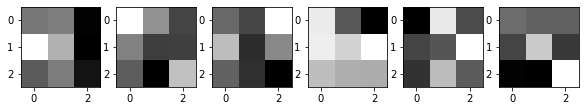

In [ ]:
new_model=copy.deepcopy(model)
import cv2


# print('Grayscale image shape:', img_gray.shape)
kernels_list=[new_model.block_1[0].weight.detach().clone(),new_model.block_1[3].weight.detach().clone(),new_model.block_2[0].weight.detach().clone(),new_model.block_2[3].weight.detach().clone(),new_model.block_3[0].weight.detach().clone(),new_model.block_3[3].weight.detach().clone()]

var=6
fig,axis=plt.subplots(1,var,figsize=(10,10))  
i=0
for kernel in kernels_list:
  # kernels = new_model.block_1[3].weight.detach().clone()
  # kernels.shape
  # kernels=kernels[0]
  # kernels = kernels - kernels.min()
  # kernels = kernels / kernels.max()

  kernels = torch.mean(kernel[0], axis=0)

  axis[i].imshow(kernels,cmap="gray")
  i+=1

In [ ]:
# Visualise 10 random images from each class
array=[[0 for j in range(10)] for i in range(10)]
for j in range(10):
  count=0
  for test_images, test_labels in train_loader:
    for k in range(64):
      if count>=10:
        break  
      elif test_labels[k].item()==j:
        print(test_labels[k].item())
        print(j)
        count+=1
        array[j][count-1]=test_images[k]
    # sample_image = test_images[0]    # Reshape them according to your needs.
    # sample_label = test_labels[0]
    # print(sample_image)
    # print(sample_label)
    # break

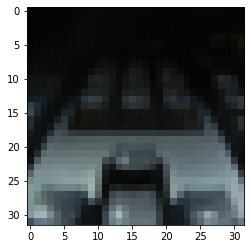

In [ ]:
for i in range(len(array)):
  for j in range(len(array[0])):
    plt.imshow(array[i][j].permute(1,2,0))
    break

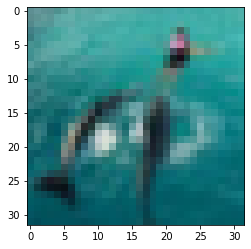

In [ ]:
plt.imshow(array[0][2].permute(1,2,0))

In [ ]:
import os
os.chdir("/content/drive/MyDrive/DeepLearning/A3_1")

for i in range(len(array)):
  for j in range(len(array[0])):
    # plt.imshow(array[i][j].permute(1,2,0))
    torchvision.utils.save_image(array[i][j],"img_"+str(i)+"_"+str(j)+".png")


FileNotFoundError: ignored

In [ ]:
class CNN_Model_1(nn.Module):

    def __init__(self, n_classes):
        super(CNN_Model_1, self).__init__()
        
        self.block_1 = nn.Sequential(            
            nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, stride=1),
            nn.ReLU(),
            nn.BatchNorm2d(16),
            nn.MaxPool2d(kernel_size = 2),
            # nn.Conv2d(in_channels=16, out_channels=16, kernel_size=3, stride=1),
            # nn.ReLU(),
            # nn.BatchNorm2d(16),
            # nn.MaxPool2d(kernel_size=1),
            # nn.Conv2d(in_channels=16, out_channels=16, kernel_size=3, stride=1),
            # nn.ReLU(),
            # nn.BatchNorm2d(16),
            # nn.MaxPool2d(kernel_size=1),
            # # nn.Conv2d(in_channels=16, out_channels=16, kernel_size=3, stride=1),
            # nn.ReLU(),
            # nn.BatchNorm2d(16),
            # nn.MaxPool2d(kernel_size=1)
            # ,
            # # nn.Conv2d(in_channels=16, out_channels=120, kernel_size=5, stride=1),
            # nn.ReLU()
        )

        self.classifier = nn.Sequential(
            nn.Linear(in_features=15*15*16, out_features=120),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(in_features=120, out_features=32),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(in_features=32, out_features=n_classes),
        )


    def forward(self, x):
        x=x.view(-1,3,32,32)
        x = self.block_1(x)
        # print(x.shape)
        x = torch.flatten(x, 1)
        # print(x.shape)
        logits = self.classifier(x)
        prob=nn.Softmax(dim=1)(logits)
        pred=nn.LogSoftmax(dim=1)(logits)
        return pred, prob

In [ ]:
class CNN_Model_2(nn.Module):

    def __init__(self, n_classes):
        super(CNN_Model_2, self).__init__()
        
        self.block_1 = nn.Sequential(            
            nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, stride=1),
            nn.ReLU(),
            nn.BatchNorm2d(16),
            # nn.MaxPool2d(kernel_size=2),
            # nn.Dropout(0.4),

            nn.Conv2d(in_channels=16, out_channels=16, kernel_size=3, stride=1),
            nn.ReLU(),
            nn.BatchNorm2d(16),
            nn.MaxPool2d(kernel_size=2),
            # nn.Dropout(0.5)
        )

        self.block_2 = nn.Sequential(
            nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1),
            nn.ReLU(),
            nn.BatchNorm2d(32),
            # nn.MaxPool2d(kernel_size=2),
            # nn.Dropout(0.4),

            nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, stride=1),
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.MaxPool2d(kernel_size=2),
            # nn.Dropout(0.4)
        )

        self.classifier = nn.Sequential(
            nn.Linear(in_features=5*5*32, out_features=120),
            nn.ReLU(),
            # nn.Dropout(0.4),
            nn.Linear(in_features=120, out_features=n_classes),
        )


    def forward(self, x):
        #print(x.shape)
        x=x.view(-1,3,32,32)
        x = self.block_1(x)
        #print(x.shape)
        
        x = self.block_2(x)
        x = torch.flatten(x, 1)
        logits = self.classifier(x)
        prob=nn.Softmax(dim=1)(logits)
        pred=nn.LogSoftmax(dim=1)(logits)
        return pred, prob

In [ ]:
#Block1+2+3 + FC and softmax
class CNN_Model_3(nn.Module):

    def __init__(self, n_classes):
        super(CNN_Model_3, self).__init__()
        
        self.block_1 = nn.Sequential(            
            nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, stride=1),
            # nn.BatchNorm2d(16),
            nn.ReLU(),
            # nn.MaxPool2d(kernel_size=1),
            nn.Conv2d(in_channels=16, out_channels=16, kernel_size=3, stride=1),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
            nn.Dropout(0.5),
        )

        self.block_2=nn.Sequential(

            nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            # nn.MaxPool2d(kernel_size=2),
            # nn.Dropout(0.5),

            nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, stride=1),
            
            #nn.BatchNorm2d(32),
            # nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
            nn.Dropout(0.5),
        )

        self.block_3=nn.Sequential(

            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1),
            nn.BatchNorm2d(64),
            # nn.ReLU(),
            # nn.MaxPool2d(kernel_size=2),
            #nn.Dropout(0.4),

            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, stride=1),
            # nn.BatchNorm2d(64),
            # nn.ReLU(),
            # nn.MaxPool2d(kernel_size=2),
            nn.Dropout(0.5)

            # nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, stride=1),
            # nn.BatchNorm2d(64),
            # nn.ReLU(),
            # nn.MaxPool2d(kernel_size=2),
            # nn.Dropout(0.8)
        )

        self.classifier = nn.Sequential(
            nn.Linear(in_features=1*1*64, out_features=20),
            # nn.ReLU(),
            # nn.Dropout(0.3),
            nn.Linear(in_features=20, out_features=n_classes),
        )


    def forward(self, x):
        #print(x.shape)
        x=x.view(-1,3,32,32)
        x = self.block_1(x)
        x = self.block_2(x)
        x = self.block_3(x)
        #print(x.shape)
        x = torch.flatten(x, 1)
        logits = self.classifier(x)
        prob=nn.Softmax(dim=1)(logits)
        pred=nn.LogSoftmax(dim=1)(logits)
        return pred, prob

In [ ]:
model

CNN_Model_3(
  (block_1): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1))
    (3): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_3): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
    (4): ReLU()
  )
  (classifier): 

In [ ]:
def get_accuracy(model, data_loader, device):
    '''
    Function for computing the accuracy of the predictions over the entire data_loader
    '''
    
    correct_pred = 0 
    n = 0
    
    with torch.no_grad():
        model.eval()
        for X, y_true in data_loader:

            X = X.to(device)
            y_true = y_true.to(device)

            _, y_prob = model(X)
            _, predicted_labels = torch.max(y_prob, 1)

            n += y_true.size(0)
            correct_pred += (predicted_labels == y_true).sum()

    return correct_pred.float() / n

def plot_losses(train_losses, valid_losses):
    '''
    Function for plotting training and validation losses
    '''
    
    # temporarily change the style of the plots to seaborn 
    plt.style.use('seaborn')

    train_losses = np.array(train_losses) 
    valid_losses = np.array(valid_losses)

    fig, ax = plt.subplots(figsize = (8, 4.5))

    ax.plot(train_losses, color='blue', label='Training loss') 
    ax.plot(valid_losses, color='red', label='Validation loss')
    ax.set(title="Loss over epochs", 
            xlabel='Epoch',
            ylabel='Loss') 
    ax.legend()
    fig.show()
    
    # change the plot style to default
    plt.style.use('default')

In [ ]:
# torch.manual_seed(RANDOM_SEED)
# model = CNN_Model(X = 1, Y = 0, Z = 0, n_fc_layers = 1, input_features = [3600], output_features = [N_CLASSES]).to(DEVICE)
model = CNN_Model_3(10).to(DEVICE)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)#,weight_decay=1e-5)
criterion = nn.NLLLoss().to(DEVICE)

In [ ]:
model, optimizer, _ = training_loop(model, criterion, optimizer, train_loader, valid_loader,135, DEVICE)

In [ ]:
loaded_model, optimizer, _ = training_loop(loaded_model, criterion, optimizer, train_loader, test_loader,135, DEVICE)

In [ ]:
get_accuracy(loaded_model, test_loader, DEVICE)

tensor(0.7430, device='cuda:0')

In [ ]:
Epoch: 49	Train loss: 0.8330	Valid loss: 0.9121	Train accuracy: 79.65	Valid accuracy: 70.13
Train loss: 0.9573	Valid loss: 0.9451	Train accuracy: 76.59	Valid accuracy: 69.73

16:52:34 --- Epoch: 134	Train loss: 0.6878	Valid loss: 0.8254	Train accuracy: 86.87	Valid accuracy: 74.13

In [ ]:
get_accuracy()

In [ ]:
filename = 'best_model_dropout0.3.sav'
# pickle.dump(model, open(filename, 'wb'))
 
# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
# result = loaded_model.score(X_test, Y_test)

In [ ]:
filename = 'new_best_model_dropout0.3.sav'
pickle.dump(loaded_model, open(filename, 'wb'))

In [ ]:
loaded_model

CNN_Model_3(
  (block_1): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1))
    (3): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_3): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
    (4): ReLU()
  )
  (classifier): 

In [ ]:
ROW_IMG = 10
N_ROWS = 5

fig = plt.figure()
for index in range(1, ROW_IMG * N_ROWS + 1):
    plt.subplot(N_ROWS, ROW_IMG, index)
    plt.axis('off')
    plt.imshow(valid_dataset.data[index], cmap='gray_r')
    
    with torch.no_grad():
        model.eval()
        _, probs = model(valid_dataset[index][0].unsqueeze(0).to(DEVICE))
        
    title = f'{torch.argmax(probs)} ({torch.max(probs * 100):.0f}%)'
    
    plt.title(title, fontsize=7)
fig.suptitle('LeNet-5 - predictions');

In [ ]:
#Block1+2+3 + FC and softmax
class CNN_Model_3(nn.Module):

    def __init__(self, n_classes):
        super(CNN_Model_3, self).__init__()
        
        self.block_1 = nn.Sequential(            
            nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, stride=1),
            # nn.BatchNorm2d(16),
            nn.ReLU(),
            # nn.MaxPool2d(kernel_size=1),
            nn.Conv2d(in_channels=16, out_channels=16, kernel_size=3, stride=1),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
            nn.Dropout(0.3),
        )

        self.block_2=nn.Sequential(

            nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            # nn.MaxPool2d(kernel_size=2),
            # nn.Dropout(0.5),

            nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, stride=1),
            
            #nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
            nn.Dropout(0.3),
        )

        self.block_3=nn.Sequential(

            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            # nn.MaxPool2d(kernel_size=2),
            #nn.Dropout(0.4),

            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, stride=1),
            # nn.BatchNorm2d(64),
            nn.ReLU(),
            # nn.MaxPool2d(kernel_size=2),
            nn.Dropout(0.3)

            # nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, stride=1),
            # nn.BatchNorm2d(64),
            # nn.ReLU(),
            # nn.MaxPool2d(kernel_size=2),
            # nn.Dropout(0.8)
        )

        self.classifier = nn.Sequential(
            nn.Linear(in_features=1*1*64, out_features=20),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(in_features=20, out_features=n_classes),
        )


    def forward(self, x):
        #print(x.shape)
        x=x.view(-1,3,32,32)
        x = self.block_1(x)
        x = self.block_2(x)
        x = self.block_3(x)
        #print(x.shape)
        x = torch.flatten(x, 1)
        logits = self.classifier(x)
        prob=nn.Softmax(dim=1)(logits)
        pred=nn.LogSoftmax(dim=1)(logits)
        return pred, prob